<a href="https://colab.research.google.com/github/MatheusHiro/TCC/blob/main/improveddpm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/openai/improved-diffusion.git

Cloning into 'improved-diffusion'...
remote: Enumerating objects: 53, done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 53
Receiving objects: 100% (53/53), 47.34 KiB | 23.67 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
cd improved-diffusion/

/content/improved-diffusion


In [ ]:
pip install -e .

Obtaining file:///content/improved-diffusion
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.9 MB/s eta 0:00:00
  Running setup.py develop for improved-diffusion


In [ ]:
!python -m pip install mpi4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp310-cp310-linux_x86_64.whl size=2744881 sha256=7bce6e6f562f7a46d92174f1cac498f47a61d1e7666e286301e1bf8d3dba9563
  Stored in directory: /root/.cache/pip/wheels/e8/1b/b5/97ec4cfccdde26e0f3590ad6e09a5242d508dff09704ef86c1
Successfully built mpi4py


In [ ]:
cd datasets/

/content/improved-diffusion/datasets


In [ ]:
!python3 cifar10.py

downloading...
100% 170498071/170498071 [00:05<00:00, 29191504.15it/s]
Extracting /tmp/tmps_2iua_f/cifar-10-python.tar.gz to /tmp/tmps_2iua_f
dumping images...
100% 50000/50000 [00:18<00:00, 2764.36it/s]
downloading...
100% 170498071/170498071 [00:05<00:00, 29420975.75it/s]
Extracting /tmp/tmppc9tn0vz/cifar-10-python.tar.gz to /tmp/tmppc9tn0vz
dumping images...
100% 10000/10000 [00:03<00:00, 2900.13it/s]


In [ ]:
cd ..

/content/improved-diffusion


In [ ]:
MODEL_FLAGS="--image_size 32 --num_channels 128 --num_res_blocks 3 --learn_sigma True --dropout 0.3"
DIFFUSION_FLAGS="--diffusion_steps 4000 --noise_schedule cosine"
TRAIN_FLAGS="--lr 1e-4 --batch_size 128"

In [ ]:
pip install keras

Alterar configure em logger.py linha 449 para dir = osp.join( '/content/My Drive/Models', datetime.datetime.now().strftime("openai-%Y-%m-%d-%H-%M-%S-%f"), )

In [ ]:
from keras.datasets import cifar10
import numpy as np
import os
from PIL import Image

# Load the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Concatenate train and test datasets
images = np.concatenate([x_train, x_test])
labels = np.concatenate([y_train, y_test])

# 'dog' class corresponds to label 5 in CIFAR-10
dog_indices = np.where(labels == 5)[0]

# Specify the path to your Google Drive folder where you want to save the images
output_dir = '/content/drive/My Drive/dog_images'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# If you want to randomly select 500 images from 'dog' class
subset_indices = np.random.choice(dog_indices, size=500, replace=False)
subset_images = images[subset_indices]

# Save each image to Google Drive
for i, img in enumerate(subset_images):
    img = Image.fromarray(img)
    img.save(os.path.join(output_dir, f'dog_{i}.png'))


170498071/170498071 [==============================] - 13s 0us/step


O script acima cria um subset do cifar10 com 500 imagens de cachorros

In [ ]:
!python scripts/image_train.py --data_dir '/content/drive/My Drive/dog_images/' $MODEL_FLAGS $DIFFUSION_FLAGS $TRAIN_FLAGS

A saída de streaming foi truncada nas últimas 5000 linhas.
------------------------
| grad_norm | 0.0723   |
| loss      | 0.00693  |
| loss_q0   | 0.0256   |
| loss_q1   | 0.000783 |
| loss_q2   | 0.000415 |
| loss_q3   | 0.00109  |
| mse       | 0.00479  |
| mse_q0    | 0.017    |
| mse_q1    | 0.000779 |
| mse_q2    | 0.000413 |
| mse_q3    | 0.00107  |
| samples   | 3.27e+07 |
| step      | 2.56e+05 |
| vb        | 0.00214  |
| vb_q0     | 0.00857  |
| vb_q1     | 4.01e-06 |
| vb_q2     | 2.11e-06 |
| vb_q3     | 2.1e-05  |
------------------------
------------------------
| grad_norm | 0.0917   |
| loss      | 0.00463  |
| loss_q0   | 0.0167   |
| loss_q1   | 0.000823 |
| loss_q2   | 0.0004   |
| loss_q3   | 0.00137  |
| mse       | 0.00426  |
| mse_q0    | 0.0152   |
| mse_q1    | 0.000818 |
| mse_q2    | 0.000398 |
| mse_q3    | 0.00135  |
| samples   | 3.27e+07 |
| step      | 2.56e+05 |
| vb        | 0.000375 |
| vb_q0     | 0.00154  |
| vb_q1     | 4.25e-06 |
| vb_q2     | 2.

In [ ]:
mkdir samples

In [ ]:
cd samples/

/content/improved-diffusion/samples


In [ ]:
cd content/improved-diffusion/

/content/improved-diffusion


In [ ]:
cd /tmp/openai-2023-07-28-02-09-13-223903/

/tmp/openai-2023-07-28-02-09-13-223903


In [ ]:
cp ./samples_10x32x32x3.npz ../../content/improved-diffusion/samples/

In [ ]:
!zip -r /content/samples.zip ./samples/

  adding: samples/ (stored 0%)
  adding: samples/samples_10x32x32x3.npz (deflated 15%)


In [ ]:
ls

cifar10ckpt/  improved_diffusion/           README.md
ckpt/         improved_diffusion.egg-info/  scripts/
datasets/     LICENSE                       setup.py


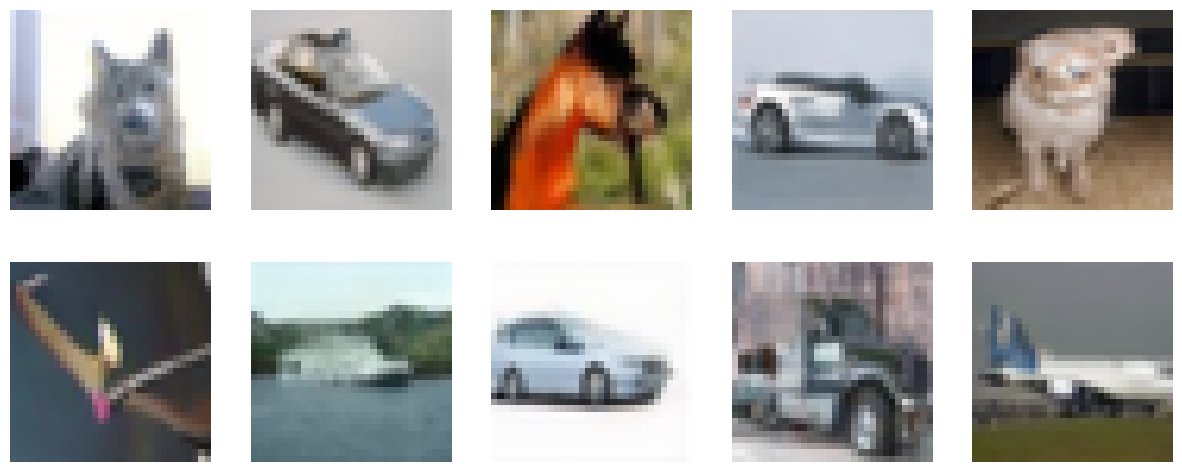

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the npz file
data = np.load('./samples_10x32x32x3.npz')

# Assuming the images are stored with the key 'images'
images = data['arr_0']

# Define the dimensions of the plot grid
W = 5
H = 2

fig, axes = plt.subplots(H, W, figsize=(15,6))

for i in range(H):
    for j in range(W):
        # We'll use (i*W + j) to index the image we want to display
        img_array = images[i*W + j]

        # Remove the axis
        axes[i, j].axis('off')

        # Display the image
        axes[i, j].imshow(img_array)

# Show the plot
plt.show()


In [ ]:
cp ./ema_0.9999_000000.pt ../../content/improved-diffusion/samples/

In [ ]:
!python scripts/image_sample.py --model_path ./ckpt/cifar10_uncond_50M_500K.pt $MODEL_FLAGS $DIFFUSION_FLAGS

Logging to /tmp/openai-2023-07-28-02-09-13-223903
creating model and diffusion...
sampling...
created 16 samples
saving to /tmp/openai-2023-07-28-02-09-13-223903/samples_10x32x32x3.npz
sampling complete


In [ ]:
cat progress.csv

In [ ]:
cd openai-2023-07-26-01-37-52-434162/

/tmp/openai-2023-07-26-01-37-52-434162


In [ ]:
cd samples/

/content/improved-diffusion/samples


In [ ]:
cd content/improved-diffusion/

[Errno 2] No such file or directory: 'content/improved-diffusion/'
/content/improved-diffusion


In [ ]:
pwd

'/content/improved-diffusion'